# Gradient Descent

According to [Wikipedia](https://en.wikipedia.org/wiki/Gradient_descent), Gradient Descent is an *iterative optimisation function* for finding the *local minimum* of a *differentiable function*.

So what does all that actually mean?

## Differential Functions and Local Minimums

It's helpful to start at the end. Here, we're using function in the mathematical sense of the term, which is something that given an input (e.g. a single number), produces an output (e.g. another number).

For example, we could use

$$ f(x) = x^2 $$

as our function. Or we could use

$$ g(y) = 5 + 2y^2 $$

as our function. The first takes an input $x$, and squares it. The second takes an input $y$, squares it, multiplies the result by two, then adds five to it.

Formally, a function assigns every element of a set $X$ to a single output in the set $Y$. Once this is set out, *differentiable* is clear: we can differentiate the function (i.e. establish a formula for the rate of change in the output).

The *minimum* of a function is the point at which the output is at its lowest possible value. For $f(x)$ above, this is 


## Iterative Optimisation

Some words

## Gradient Descent

Some words

In [1]:
import numpy as np

def gd(
    gradient_function: callable,
    start: float,
    learn_rate: float,
    max_iter: int = 100,
    tol: float=0.01
    ):
    """
    A simple implementation of gradient descent to optimise single-parameter functions

    Args:
        gradient_function: Callable for the gradient of the function being optimised
        start: Starting value to optimise from
        learn_rate: Learning rate for the update
        max_iter: Maximum number of iterations
        tol: Break clause for the gradient descent

    Returns: a dictionary containing the following:
        minimum: The estimated value at which the minimum of the function is found
        steps: Each step in estimating the minimum
        num_iter: The number of iterations
        final_diff: The final difference in estimated values
    """
    
    steps = [start] #tracking our steps
    minimum = start
    
    iter = 0
    diff = np.Inf
    while iter < max_iter and diff > tol:
        
        # Update
        minimum = minimum - learn_rate * gradient_function(minimum)
        
        # Store, increment, check diff
        steps.append(minimum)
        iter += 1
        diff = np.abs(steps[len(steps)-1] - minimum)
  
    # Store output
    out = {
        "minimum": minimum,
        "steps": steps,
        "num_iter": iter,
        "final_diff": diff
    }
    
    return out

Example func below

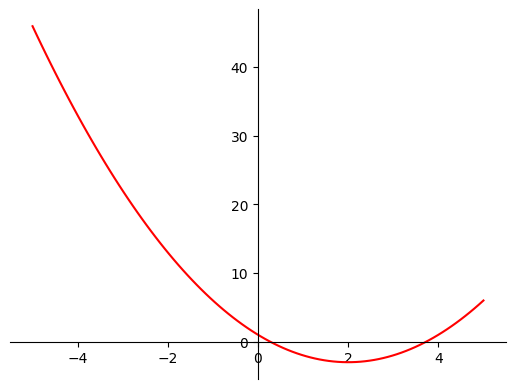

In [27]:
import matplotlib.pyplot as plt

# The function we're considering
def quadratic(x):
    return x**2 - 4*x + 1

# 100 linearly spaced numbers
x = np.linspace(-5,5,100)

# apply the function
y = quadratic(x)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()

Let's find the gradient

In [26]:
def quadratic_gradient(x):
    return 2*x - 4

est = gd(quadratic_gradient, start=9, learn_rate=0.5)
print(est["minimum"])

2.0


It worked!

## Functions of Many Variables

Something something parital derivatives